Daniela Quijano

Answers to questions:
### 1.	What is an R object? (1pt)
Data types are treated as objects in R an object is an instance of a class. Each object has specifc attributes and methods that go along with it. Some examples of objects are vectors, lists, matrices, arrays, factors and data frames. 
### 2.	How many ways can data be assigned to an R object? (1pt)
A variable can be assigned in three ways:
X=1
X<-1
1->X
### 3.	Why do you think it is important to ensure that data objects are of the correct type? (1pt)
If data objects are not of the same type then R will make a generalized assumption and will force them to be of the same type. We want to make sure data is the correct type to make sure the analysis is correct. 
### 4.	What is the relationship between vectors, matrices, and data frames? (1pt)
A vector is an array of values. A matrix could be thought of as vectors put together in two or more dimensions. A dataframe could be thought of as a matrix but made up of different variables and different data types.
### 5.	Why might a data frame be more suitable than a matrix for holding heterogeneous biological data? (1pt)
You cannot have different datatypes in a matrix. A dataframe allows for the storage of different datatypes. 


## Part 2

### Create a matrix called transcriptome

In [159]:
#Make vectors with column and row names
elements<-c('Control','Nitrogen','Phosphate','Potassium')
genes<-c('GeneA','GeneB','GeneC','GeneD','GeneE')

#Make vectors with the value of every column
Control<-c(89,90,78,81,62)
Nitrogen<-c(78,99,94,83,51)
Phosphate<-c(77,85,99,80,99)
Potassium<-c(56,97,87,79,88)

#Create matrix with vectors defined as columns
#Name rows and columns with previously defined string vectors, print matrix
transcriptome<-matrix(c(Control, Nitrogen, Phosphate, Potassium),nrow=5,ncol=4)
colnames(transcriptome)<-elements
rownames(transcriptome)<-genes
transcriptome

,Control,Nitrogen,Phosphate,Potassium
GeneA,89,78,77,56
GeneB,90,99,85,97
GeneC,78,94,99,87
GeneD,81,83,80,79
GeneE,62,51,99,88


Calculate the Average expression for each gene accross all genes

In [160]:
#Loop through every row in the matrix and assign the mean to expression_average vector 
expression_average=numeric()
for (i in 1:nrow(transcriptome)){
    expression_average[i]=(mean(transcriptome[i,]))  
}
print(expression_average)

[1] 75.00 92.75 89.50 80.75 75.00


### Calculate the average expression for each gene across all experiments.

In [161]:
#Added expression_average column w/ cbind
transcriptome<-cbind(transcriptome, expression_average)
transcriptome

,Control,Nitrogen,Phosphate,Potassium,expression_average
GeneA,89,78,77,56,75.00
GeneB,90,99,85,97,92.75
GeneC,78,94,99,87,89.50
GeneD,81,83,80,79,80.75
GeneE,62,51,99,88,75.00


### Sort the matrix so that the gene with the highest expression is on top. 

In [162]:
#Gene B has the highest avg expression, sorted in decreasing order, transcriptome assigned to new dataframe, sorted_genes
sorted_genes<-transcriptome[order(-expression_average),]
sorted_genes

,Control,Nitrogen,Phosphate,Potassium,expression_average
GeneB,90,99,85,97,92.75
GeneC,78,94,99,87,89.50
GeneD,81,83,80,79,80.75
GeneA,89,78,77,56,75.00
GeneE,62,51,99,88,75.00


## Part 3

### Load the file expvalues.txt into R

In [163]:
#Read in file as a table. Print first few rows
data=read.table('/Users/danielaquijano/Documents/NYU MASTERS/SPRING 2022/Transcriptomics/Source_Files/expvalues.txt',sep='')
#head(data)
data=as.matrix(data)
head(data)

,Control1,Control2,Control3,Treatment1,Treatment2,Treatment3
244901_at,229.98565,353.59949,178.49171,112.90800,152.91835,320.83235
244902_at,171.14980,84.45094,41.37195,170.17262,134.40814,193.52611
244903_at,314.97768,373.31250,52.90873,196.30256,237.51520,253.37774
244904_at,24.04366,175.31604,94.68424,82.78488,18.43639,87.00857
244905_at,15.86923,40.04125,58.76573,341.35340,16.80135,68.94204
244906_at,381.06379,218.90597,307.01488,162.54109,264.47945,263.66098


### Calculate the mean of the control samples and the mean of the treatment samples for each gene. 

In [164]:
groups<-factor(c('control','control','control','experimental','experimental','experimental'))

In [165]:
avg_ctrl<-vector()

for (i in 1:nrow(data)){
    x<-tapply(as.numeric(data[i,]),groups,mean)
    avg_ctrl<-rbind(avg_ctrl,x)
}

rownames(avg_ctrl)<-rownames(data)
head(avg_ctrl)

,control,experimental
244901_at,254.02562,195.55290
244902_at,98.99090,166.03562
244903_at,247.06630,229.06517
244904_at,98.01465,62.74328
244905_at,38.22541,142.36560
244906_at,302.32821,230.22717


In [166]:
#This was a test on tapply
#test<-t(apply(as.matrix(data), 1, tapply, groups, mean))
#print(test)

### Calculate the ratio of average treatment/ average control for each gene. 

In [167]:
#Calculate the ratio of average treatment/ average control for each gene, bind ratio to data
data<-cbind(data, avg_ctrl)
ratio<-data[,8]/data[,7]
data<-cbind(data, ratio)
head(data)


,Control1,Control2,Control3,Treatment1,Treatment2,Treatment3,control,experimental,ratio
244901_at,229.98565,353.59949,178.49171,112.90800,152.91835,320.83235,254.02562,195.55290,0.7698157
244902_at,171.14980,84.45094,41.37195,170.17262,134.40814,193.52611,98.99090,166.03562,1.6772817
244903_at,314.97768,373.31250,52.90873,196.30256,237.51520,253.37774,247.06630,229.06517,0.9271405
244904_at,24.04366,175.31604,94.68424,82.78488,18.43639,87.00857,98.01465,62.74328,0.6401419
244905_at,15.86923,40.04125,58.76573,341.35340,16.80135,68.94204,38.22541,142.36560,3.7243712
244906_at,381.06379,218.90597,307.01488,162.54109,264.47945,263.66098,302.32821,230.22717,0.7615140


### Take the log2 of the ratio. 

In [168]:
#log2 fold change calculations, bind to data
ratio_log2<-log2(ratio)
data<-cbind(data, ratio_log2)
head(data)

,Control1,Control2,Control3,Treatment1,Treatment2,Treatment3,control,experimental,ratio,ratio_log2
244901_at,229.98565,353.59949,178.49171,112.90800,152.91835,320.83235,254.02562,195.55290,0.7698157,-0.3774151
244902_at,171.14980,84.45094,41.37195,170.17262,134.40814,193.52611,98.99090,166.03562,1.6772817,0.7461250
244903_at,314.97768,373.31250,52.90873,196.30256,237.51520,253.37774,247.06630,229.06517,0.9271405,-0.1091402
244904_at,24.04366,175.31604,94.68424,82.78488,18.43639,87.00857,98.01465,62.74328,0.6401419,-0.6435364
244905_at,15.86923,40.04125,58.76573,341.35340,16.80135,68.94204,38.22541,142.36560,3.7243712,1.8969969
244906_at,381.06379,218.90597,307.01488,162.54109,264.47945,263.66098,302.32821,230.22717,0.7615140,-0.3930575


### How many genes have a log2 fold change > 1 OR < -1 ? 

In [169]:
#How many genes have a log2 fold change > 1 OR < -1
#subset the data frame, check which rows have an absolute value greater than 1 
induced_genes<-as.data.frame(subset(data, data[,"ratio_log2"] > 1 | data[,"ratio_log2"] < -1))
head(induced_genes)
typeof(induced_genes)
print(nrow(data))
print(nrow(induced_genes))
#The filtered dataframe only has 4244 genes with expression greater than 1 or less than -1


,Control1,Control2,Control3,Treatment1,Treatment2,Treatment3,control,experimental,ratio,ratio_log2
244905_at,15.869235,40.04125,58.76573,341.353405,16.801354,68.94204,38.22541,142.36560,3.7243712,1.896997
244913_at,38.116250,57.01160,50.12533,13.602490,8.737703,15.45555,48.41772,12.59858,0.2602060,-1.942274
244914_at,9.206320,23.66153,37.63685,25.381654,7.404548,130.13789,23.50157,54.30803,2.3108260,1.208409
244916_at,3.371939,38.96267,16.94395,68.912713,2.800184,52.70934,19.75952,41.47408,2.0989414,1.069662
244917_at,12.290308,16.83069,19.14878,48.150699,10.206957,38.33083,16.08993,32.22949,2.0030854,1.002224
244925_at,62.574942,85.56751,56.25979,9.864841,41.618571,29.01283,68.13408,26.83208,0.3938129,-1.344418


[1] "list"

[1] 22810
[1] 4244


### Save the names of the genes that have a log2 fold change > 1 into a file called “Induced_genes.txt” 

In [177]:
#Save the names of the genes that have a log2 fold change > 1 into a file called “Induced_genes.txt” 
#Write.table, separator is space
#We can see that now only 1850 genes have a ratio_log2 greater than one 
filter<-as.data.frame(subset(induced_genes, induced_genes[,"ratio_log2"] > 1))
head(filter)
write.table(filter, file = 'induced_genes.txt', sep = ' ')
nrow(filter)

,Control1,Control2,Control3,Treatment1,Treatment2,Treatment3,control,experimental,ratio,ratio_log2
244905_at,15.869235,40.04125,58.76573,341.35340,16.801354,68.94204,38.22541,142.36560,3.724371,1.896997
244914_at,9.206320,23.66153,37.63685,25.38165,7.404548,130.13789,23.50157,54.30803,2.310826,1.208409
244916_at,3.371939,38.96267,16.94395,68.91271,2.800184,52.70934,19.75952,41.47408,2.098941,1.069662
244917_at,12.290308,16.83069,19.14878,48.15070,10.206957,38.33083,16.08993,32.22949,2.003085,1.002224
244945_at,157.299361,204.15104,24.23849,552.28230,93.524026,129.35776,128.56296,258.38803,2.009817,1.007064
244956_s_at,95.024495,40.62732,28.03325,459.47534,92.258511,24.02345,54.56169,191.91910,3.517470,1.814538


[1] 1850

### Boxplot to show the distribution of values for each induced genes in each experiment

In [181]:
getwd()

[1] "/Users/danielaquijano/Documents/GitHub/Transcriptomics-Course-Projects"

pdf 
  2

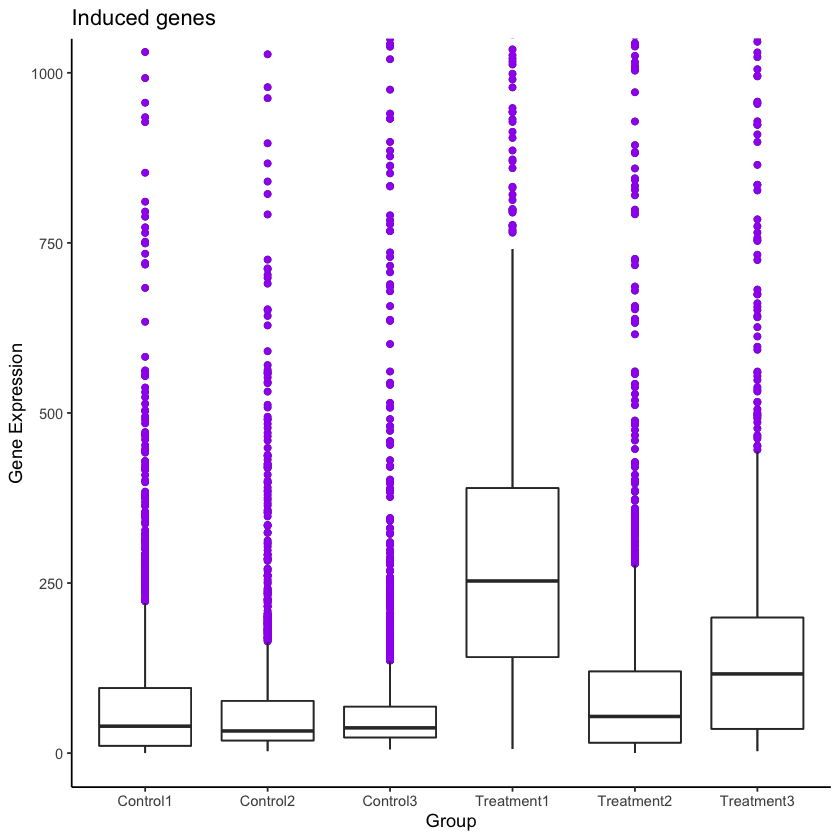

In [183]:
#using stack in order to make the boxplot through all columns
#ggplot library 
#For better visualization, changing the scale with y_lim
#Saving to pdf file, and closing w/ dev.off()
#Printing the plot as well for convenience.
library(ggplot2)
pdf(file = '/Users/danielaquijano/Documents/GitHub/Transcriptomics-Course-Projects/boxplot.pdf')
plot<-ggplot(stack(filter[1:6]), aes(x = ind, y = values)) +
  geom_boxplot()+theme_classic()+
    labs(title="Induced genes", x="Group", y="Gene Expression")+
        coord_cartesian(ylim = c(0, 1000))+
            geom_boxplot(outlier.colour = 'purple')

dev.off()
plot